In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
import os
import torch

In [4]:
path = Path('./cleaned_brats/')
train = path/'train'

In [5]:
img_path = train/'img'
msk_path = train/'mask'

In [28]:
def norm(t):
    subbed = t-t.min()
    return subbed/subbed.max()

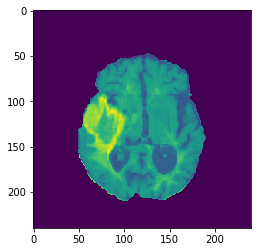

In [53]:
x = torch.load(np.random.choice(img_path.ls(),1)[0])[:,:,:3]
#x = x.permute(2,0,1)[:3,:,:]
x_summed = torch.sum(x,dim=2)
plt.imshow(norm(x_summed))

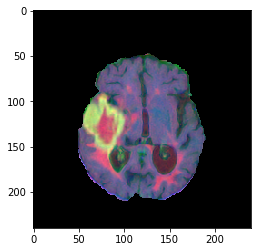

In [55]:
plt.imshow(x)

torch.Size([240, 240])

In [57]:
def open_tensor(fn):
    x = torch.load(fn)
    return Image(x.permute(2,0,1)[:3,:,:])


#class TensorSegmentationItemList(SegmentationItemList):
#    def open(self, fn): return open_tensor(fn)

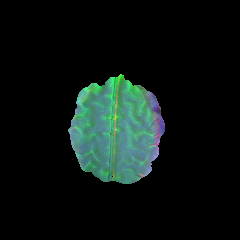

In [64]:
x = np.random.choice(img_path.ls(),1)[0]
open_tensor(x)

In [83]:
vision.data.open_image = open_tensor

In [94]:
import pandas as pd
import os

In [100]:
def get_y(p):
    return msk_path/f'mask_{p.name}'

get_y(x)

PosixPath('cleaned_brats/train/mask/mask_pat346_0001_69.pt')

In [105]:
data = ImageList.from_folder(img_path, suffix='.pt')

TypeError: __init__() got an unexpected keyword argument 'suffix'

In [110]:
class TensorImage(ItemBase):
    def __init__(self, img):
        self.img1 = img
        self.obj,self.data = img,img.data
    def apply_tfms(self):
        return self

In [8]:
data = (SegmentationItemList.from_folder(img_path)
        #Where to find the data? -> in path_img and its subfolders
        .split_by_rand_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_fn, classes=codes)
        #How to label? -> use the label function on the file name of the data
        .transform(get_transforms(), tfm_y=True, size=128)
        #Data augmentation? -> use tfms with a size of 128, also transform the label images
        .databunch(bs=8))
        #Finally -> use the defaults for conversion to databunch

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/fastai/data_block.py:454: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


NameError: name 'get_y_fn' is not defined